In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**PCA and t-SNE Project:**

 Auto MPG

In [ ]:
df = pd.read_csv("auto-mpg.csv") # reads the data

In [ ]:
df.head() # displays the top 5 rows of the data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [ ]:
df.shape # displays the shape of the data

(398, 8)

In [ ]:
df.info() # displays Dtype of and any nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


**Observations:**

There are 398 observations and 8 columns in the data. All variables except horsepower and car name are of numeric data type. The horsepower must be a numeric data type. We will explore this further.

In [ ]:
df.isna().sum() # displaying all nulls in a summary 

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [ ]:
df["car name"].nunique() # displaying unique values for car name

305

In [ ]:
df1 = df.copy() # creating a copy of the data
ndf = df1.drop("car name", axis=1) # dropping car name from the data

In [ ]:
df["cylinders"].unique()# displaying unique values for cylinders

array([8, 4, 6, 3, 5])

In [ ]:
ndf["horsepower"] = pd.to_numeric(ndf["horsepower"], errors="coerce") # this turned all the ? in to nan so i could address them

In [ ]:
mean_hp = ndf.groupby("cylinders")["horsepower"].transform("mean") # this grouped cylinders and horsepower to get an average
mean_hp


0      158.300971
1      158.300971
2      158.300971
3      158.300971
4      158.300971
          ...    
393     78.281407
394     78.281407
395     78.281407
396     78.281407
397     78.281407
Name: horsepower, Length: 398, dtype: float64

In [ ]:
ndf['horsepower'] = ndf["horsepower"].fillna(mean_hp) # this filled all the nan this the average of cylinders and horsepower
ndf["horsepower"].isna().sum()

0

In [ ]:
ndf.describe() # computes and displays summary statistics for the data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.132947,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.310886,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


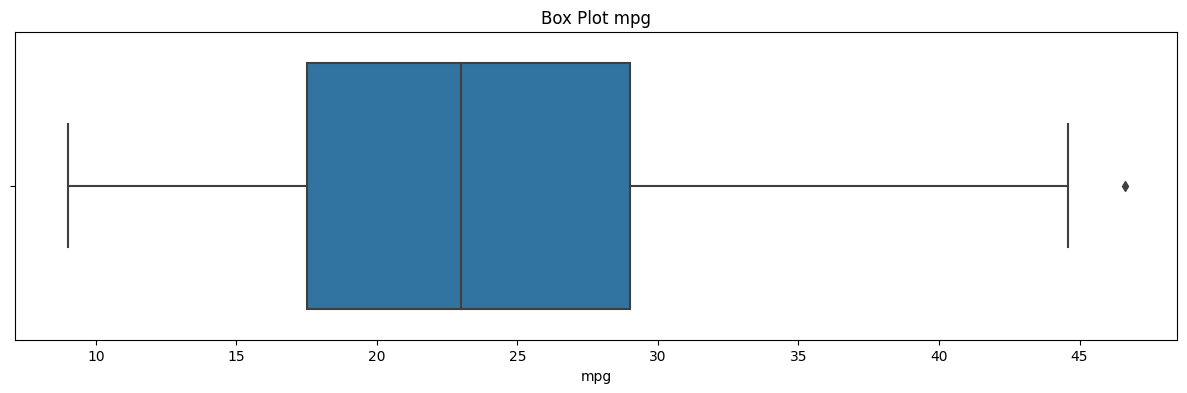

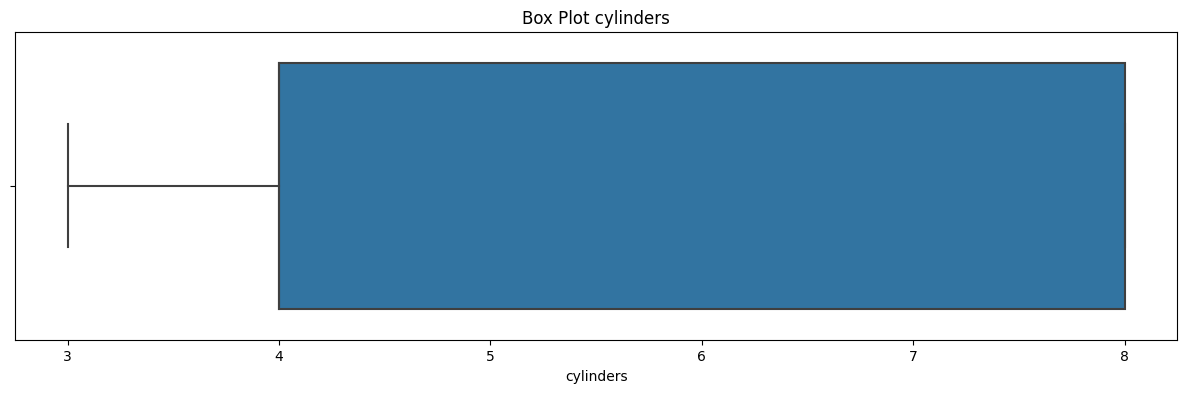

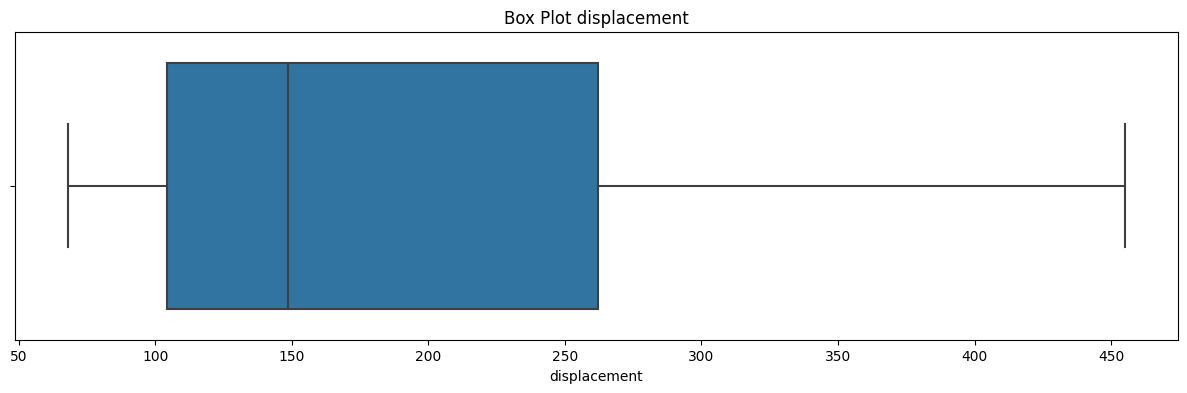

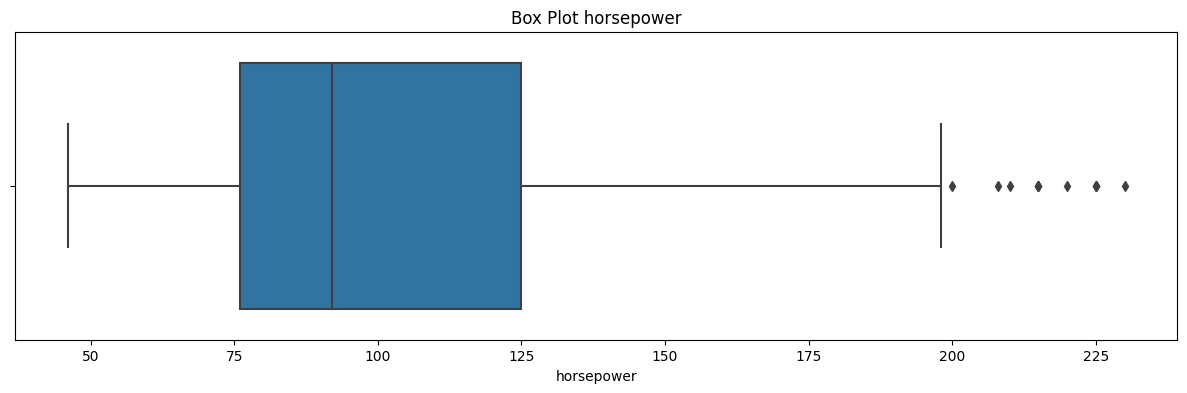

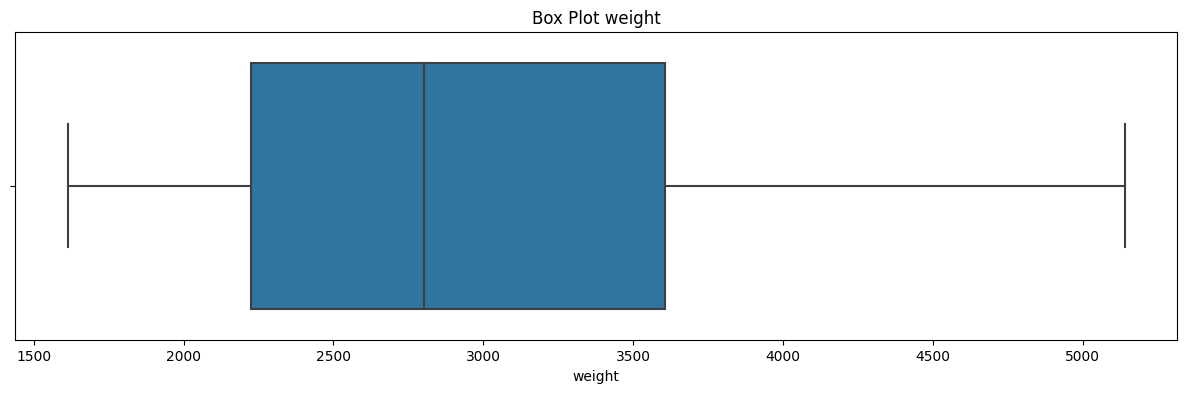

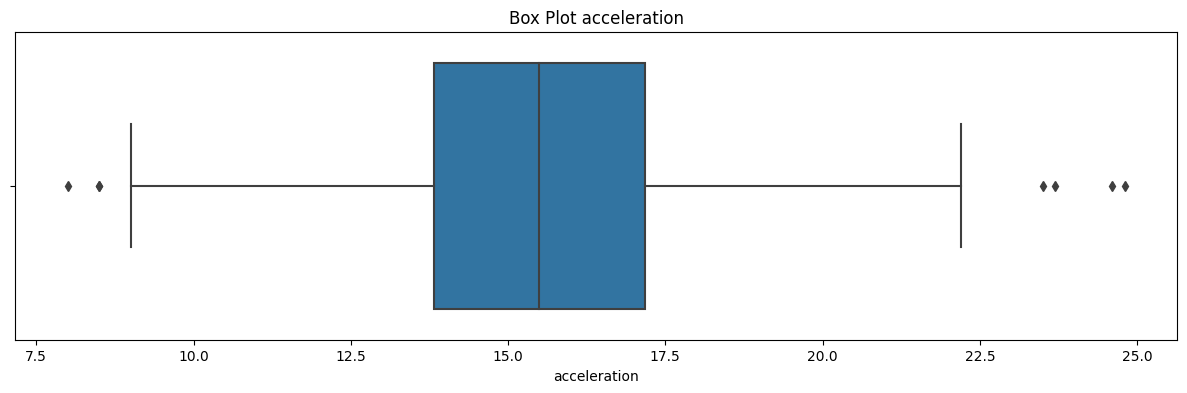

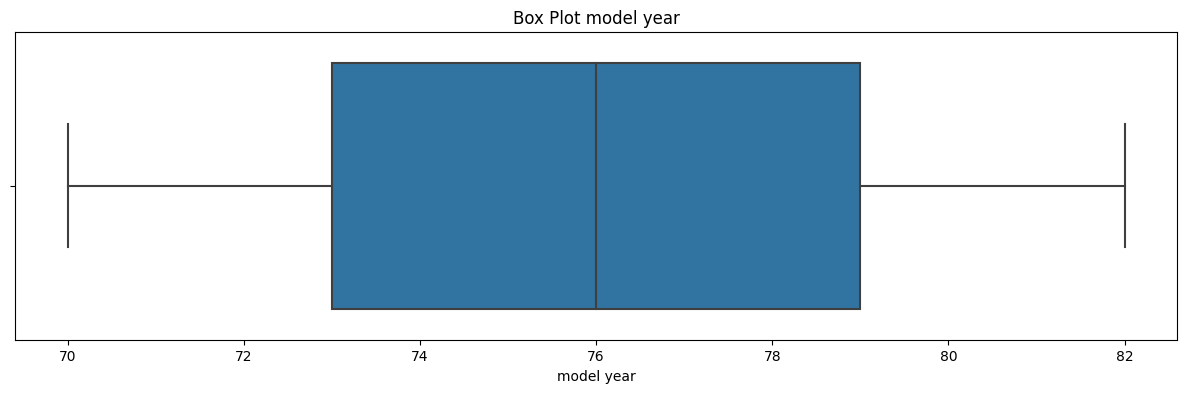

In [ ]:
for column in ndf.columns:         # displaying Box Plot for all columns
  plt.figure(figsize = (15, 4))
  sns.boxplot(x=ndf[column])
  plt.title(f"Box Plot {column}")
  plt.show()

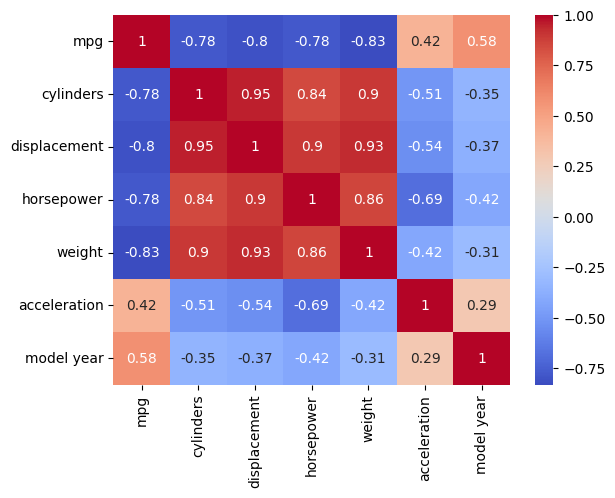

In [ ]:
plt.figsize = (15, 4)      # displaying a heatmap for all columns    
sns.heatmap(ndf.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
scaler_s = StandardScaler()           # scaling the data using standard scaler
scaled_data2 = scaler_s.fit_transform(ndf)
scaled_ndf2 = pd.DataFrame(scaled_data2, columns=ndf.columns)
scaled_ndf2


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.676038,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.590766,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.198740,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.198740,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.937389,0.565841,-1.840117,-1.627426
...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.473906,-0.213324,0.011586,1.621983
394,2.624265,-0.856321,-0.925936,-1.362500,-0.993671,3.279296,1.621983
395,1.087017,-0.856321,-0.561039,-0.526177,-0.798585,-1.440730,1.621983
396,0.574601,-0.856321,-0.705077,-0.656852,-0.408411,1.100822,1.621983


In [ ]:
scaled_ndf2.shape[1] # displaying the shape of features

7

In [ ]:
n = scaled_ndf2.shape[1]
pca = PCA(n_components=scaled_ndf2.shape[1], random_state=1) # instantiate our prinicpal component analysis object n_components are 7
pca_data = pca.fit_transform(scaled_ndf2)
principal_components =  pd.DataFrame(data=pca.fit_transform(scaled_data2)) # create the dataframe for the pca
principal_components

,0,1,2,3,4,5,6
0,2.662731,0.917977,-0.556518,0.734680,-0.555186,-0.102005,-0.118250
1,3.523929,0.791240,-0.668117,0.493348,-0.035719,0.199478,0.102321
2,2.999241,0.863215,-0.979851,0.713210,-0.291696,0.128766,-0.054431
3,2.938512,0.950017,-0.604612,0.529345,-0.284757,0.287922,-0.120328
4,2.931725,0.932907,-1.076737,0.553517,-0.550035,-0.004813,-0.166800
...,...,...,...,...,...,...,...
393,-1.418808,-1.224742,-0.290861,-0.672078,0.071725,-0.179718,0.100772
394,-4.091460,-1.283951,1.955138,1.382683,0.733899,0.191551,0.086921
395,-1.544970,-1.248341,-1.911894,-0.327552,-0.239061,-0.252655,0.147935
396,-2.020542,-1.133455,0.605144,-0.462551,0.196578,0.099260,0.074316


In [ ]:
exp = pca.explained_variance_ratio_ # gives us the eigenvalues corresponding to each principal component

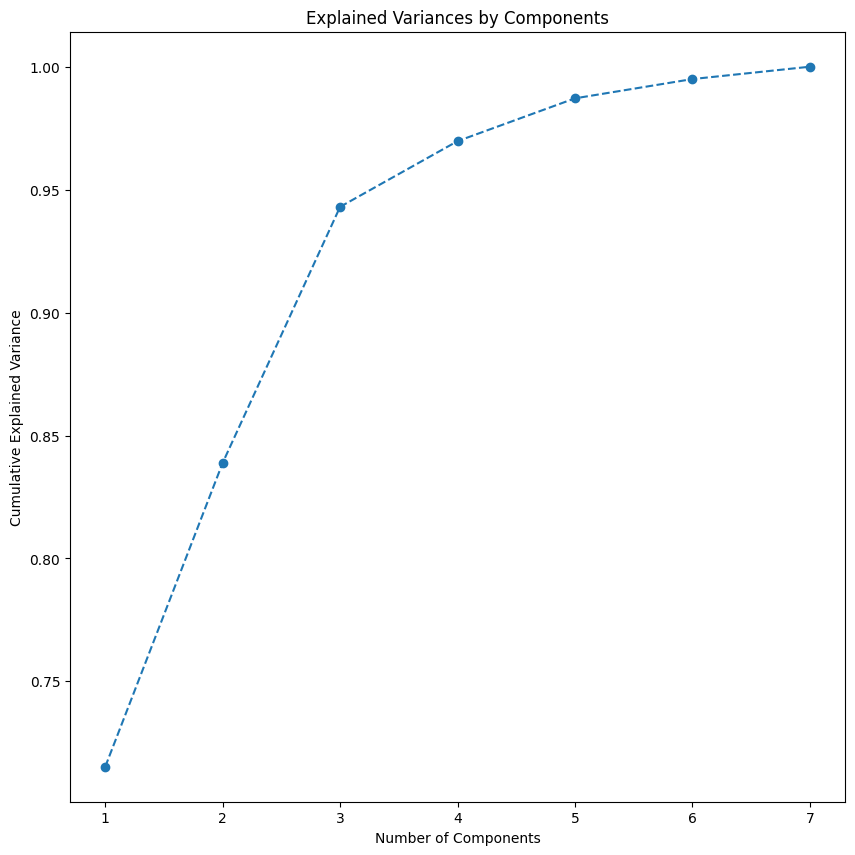

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1, 8), exp.cumsum(), marker = 'o', linestyle = '--') # creating our elbow plot for further visualization
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [ ]:
sum = 0
for ix, i in enumerate(exp):
    sum = sum + i
    if(sum>0.90):  # formula for 90% variance we find that droping 10% of the data
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:**

There are 3 PCA that make up approximately 90% of the data.

In [ ]:
pc_comps = ['PC1', 'PC2', 'PC3'] # simple array for index
df_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = scaled_ndf2.columns)
df_pca

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
PC1,-0.40,0.42,0.43,0.42,0.41,-0.28,-0.23
PC2,-0.21,-0.19,-0.18,-0.09,-0.22,0.02,-0.91
PC3,-0.26,0.14,0.10,-0.17,0.28,0.89,-0.02


In [ ]:
def color_high(val):
    if val <= -0.40:
        return "background: green"
    
    elif val >= 0.40:
        return "background: red"   
    
df_pca.T.style.applymap(color_high) # here we use applymap function to pass each value into color_high for dimension reduction

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:**

Since 3 PCA make up approximately 90% of the data and the coefficients first three principal components make it clear that we can can drop the reamining 10% of the data to succesfully begin modeling with tSNE and PCA.

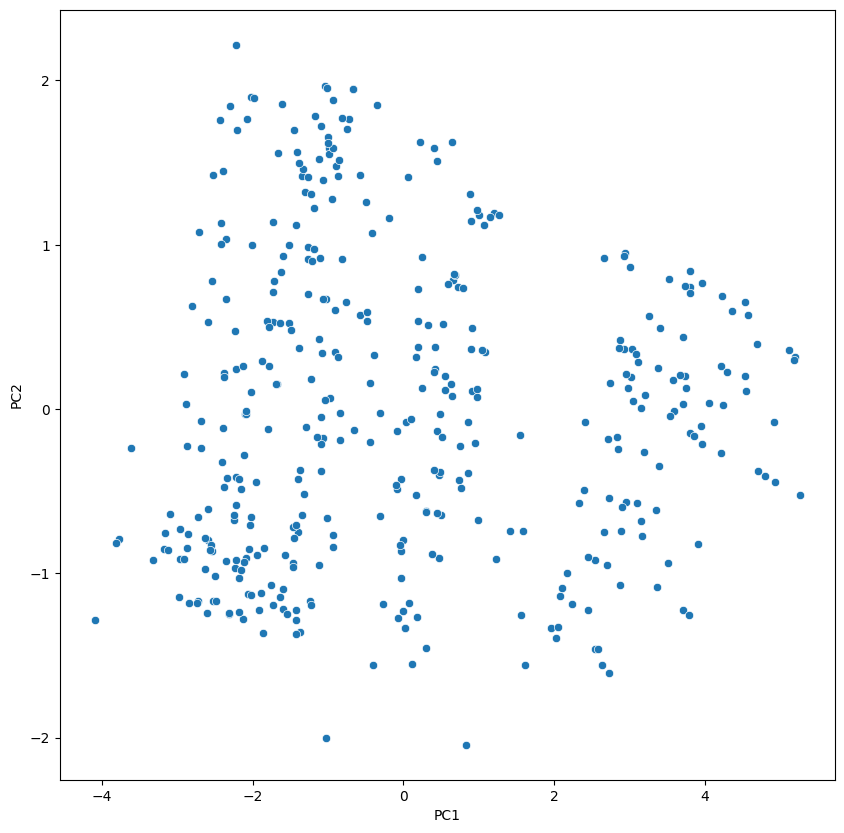

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = principal_components[0], y = principal_components[1]) # we have 3 components with pca index 0 and index 1 being the largest
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Observations:**

The PCA  does not reduce dimensionality nor lower-dimensional sub-space so we cant gather enough information using this technique.

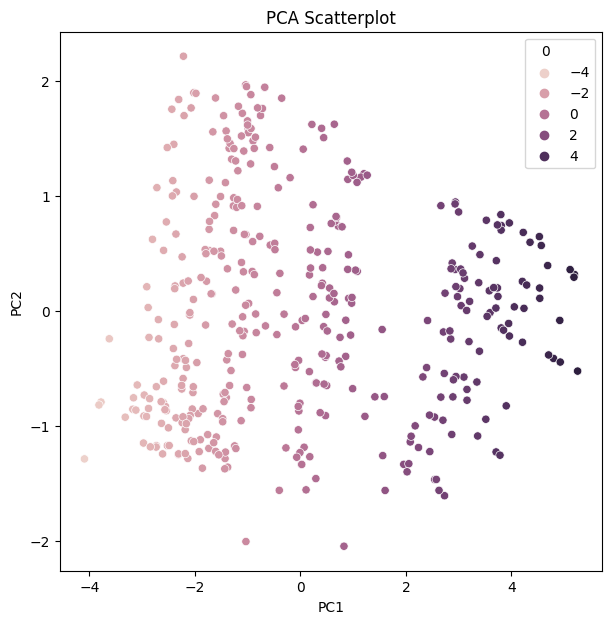

In [ ]:
df_concat = pd.concat([principal_components[0],principal_components[1]], axis = 1) # here we concat the pca components 1, and 2 into single dataframe axis 1 means horizontal
plt.figure(figsize = (7, 7))
sns.scatterplot(x=0, y=1, hue=0, data= df_concat) # runs this plot on the concatenated dataframe
plt.title("PCA Scatterplot")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
tsne = TSNE(random_state=1, n_components=2) # instantiate our TSNE object with required random state 1 and n_components 2 (2 pca components)
tsne_data = tsne.fit_transform(pca_data) # fit transform the pca data
tsne_data = pd.DataFrame(data=tsne_data, columns = ["Component 1", "Component 2"])
tsne_data.shape

(398, 2)

In [ ]:
tsne_data.head() # displays the top 5 

,Component 1,Component 2
0,37.442120,3.341058
1,38.059357,1.326339
2,38.037571,2.455230
3,37.439068,2.524030
4,38.111629,2.934304


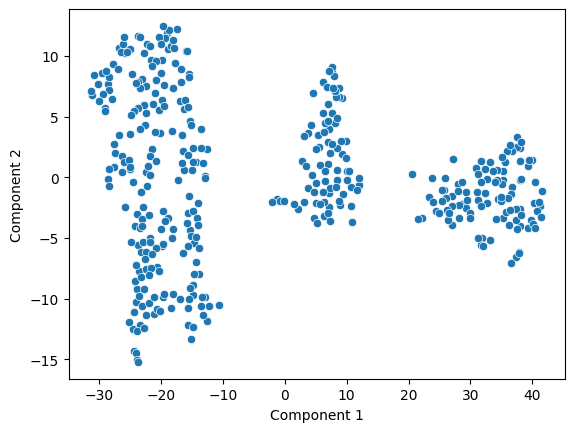

In [ ]:
sns.scatterplot(x = tsne_data.iloc[:,0], y = tsne_data.iloc[:,1]) # iloc requires 2 index with left reprensenting the row and right representing the column
plt.show()

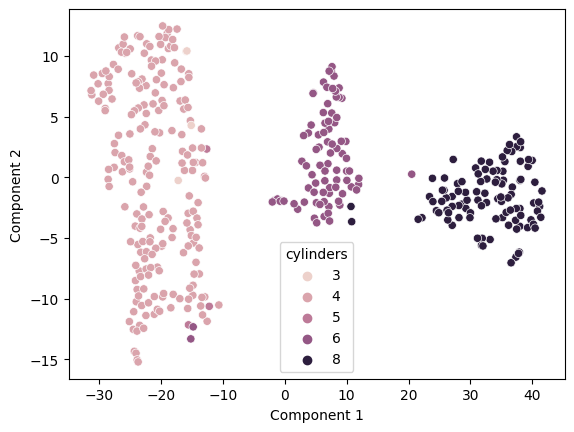

In [ ]:
sns.scatterplot(x = tsne_data.iloc[:,0], y = tsne_data.iloc[:,1], hue = df.cylinders) # just changing hue
plt.show()

**Observations**

tSNE really reduced enough dimensionality to help visualize high-dimensional data. It is clear that there is a strong correlation with this data.

In [ ]:
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'
    elif (first_component > -20 ) and (first_component < 5):
        return 'group_2'
    else: 
        return 'group_3'

tsne_data['groups'] = tsne_data.apply(grouping, axis = 1) # here is another apply method on our tsnes dataframe creating a new column called groups based on value
tsne_data

,Component 1,Component 2,groups
0,37.442120,3.341058,group_1
1,38.059357,1.326339,group_1
2,38.037571,2.455230,group_1
3,37.439068,2.524030,group_1
4,38.111629,2.934304,group_1
...,...,...,...
393,-14.318193,-4.951179,group_2
394,-23.691706,-15.222559,group_3
395,-19.334913,-3.634737,group_2
396,-15.350490,-9.144924,group_2


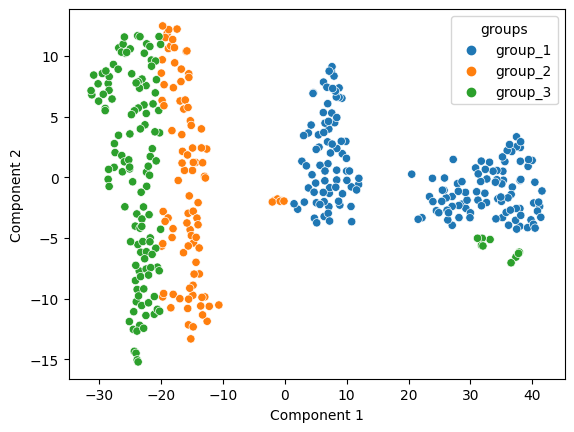

In [ ]:
sns.scatterplot(x = tsne_data.iloc[:,0], y = tsne_data.iloc[:,1], hue = tsne_data.iloc[:,2]) # hue change again
plt.show()

**Obserevation**

This  scatter plot clearly breaks down the data into idenifable clusters that we can begin to make predictions with.

In [ ]:
df['groups'] = tsne_data['groups'] # creating another column called groups for our df dataframe based on tsne_data

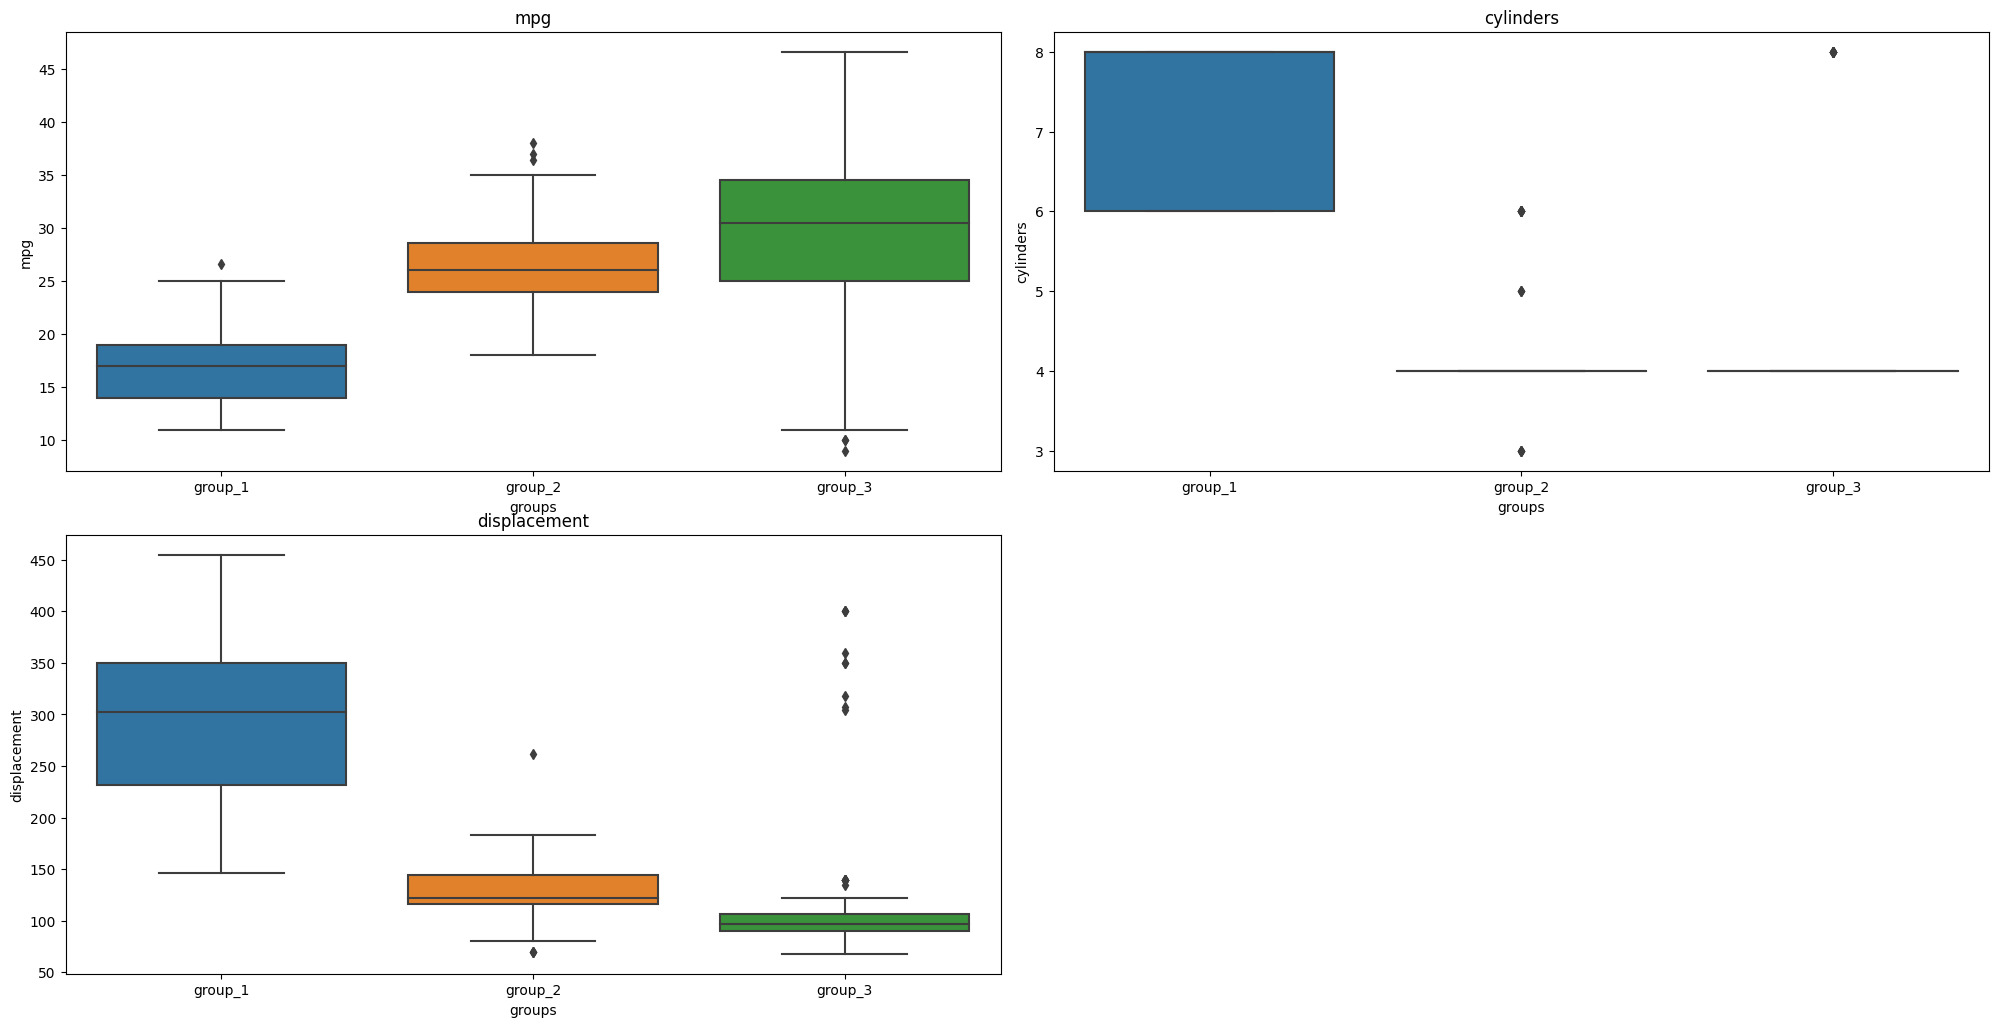

In [ ]:
all_col = df.columns.tolist() # this creates a list of columns for us to enumerate and loop through giving index and column name
plt.figure(figsize = (20, 20))

for index, column in enumerate(all_col): 
    if index == 3:
        break
    
    plt.subplot(4, 2, index + 1)
    plt.tight_layout()
    plt.title(column)
    sns.boxplot(x=df["groups"], y=column, data=df)

plt.show()

**Conclusions:**

It is clear people in group 1 are more impressed with cylinders and displacement than with MPG. People in group 2 and 3 are not impressed with cylinders and displacement but more concerned with MPG than anything else. 

**Unsupervised Learning Project:**

AllLife Bank Customer Segmentation

In [ ]:
data = pd.read_excel("/content/Credit Card Customer Data.xlsx")  # reading the excel file
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
data.shape  # displays the shpe of the dataframe

(660, 7)

In [ ]:
data.info()  # displays information about the dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

There are 660 observations and 7 columns in the dataset. All the columns have 660 non-null values, i.e., there are no missing values. All the columns are of integer data type.

In [ ]:
data.isna().sum()  # displays any nulls

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
data.nunique()  # displaying unique values of the data frame

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [ ]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [ ]:
nddf = data.drop_duplicates(subset="Customer Key").copy(deep=True) # deep copy per good practice
nddf

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [ ]:
nddf.drop(columns=["Sl_No", "Customer Key"], inplace=True) # drop customer key (why even remove duplicates?)

In [ ]:
nddf.describe().T  # displays summary statistics for nddf dataframe

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,655.0,34242.748092,37240.896986,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,655.0,4.691603,2.169325,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,655.0,2.401527,1.633648,0.0,1.0,2.0,4.0,5.0
Total_visits_online,655.0,2.606107,2.940380,0.0,1.0,2.0,4.0,15.0
Total_calls_made,655.0,3.601527,2.867352,0.0,1.0,3.0,5.0,10.0


In [ ]:
nddf.drop_duplicates(inplace=True) # inplace true prevents copy and allows in place/permanent removal
nddf

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [ ]:
nddf.shape  # just checking shape again

(644, 5)

In [ ]:
nddf.describe().T  # confirming drop_duplicates worked

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.0,34543.478261,37428.704286,3000.0,11000.0,18000.0,48000.00,200000.0
Total_Credit_Cards,644.0,4.694099,2.175338,1.0,3.0,5.0,6.00,10.0
Total_visits_bank,644.0,2.395963,1.626964,0.0,1.0,2.0,4.00,5.0
Total_visits_online,644.0,2.624224,2.957728,0.0,1.0,2.0,4.00,15.0
Total_calls_made,644.0,3.608696,2.880025,0.0,1.0,3.0,5.25,10.0


Avg_Credit_Limit
Skew : 2.19
Total_Credit_Cards
Skew : 0.17
Total_visits_bank
Skew : 0.15
Total_visits_online
Skew : 2.21
Total_calls_made
Skew : 0.65


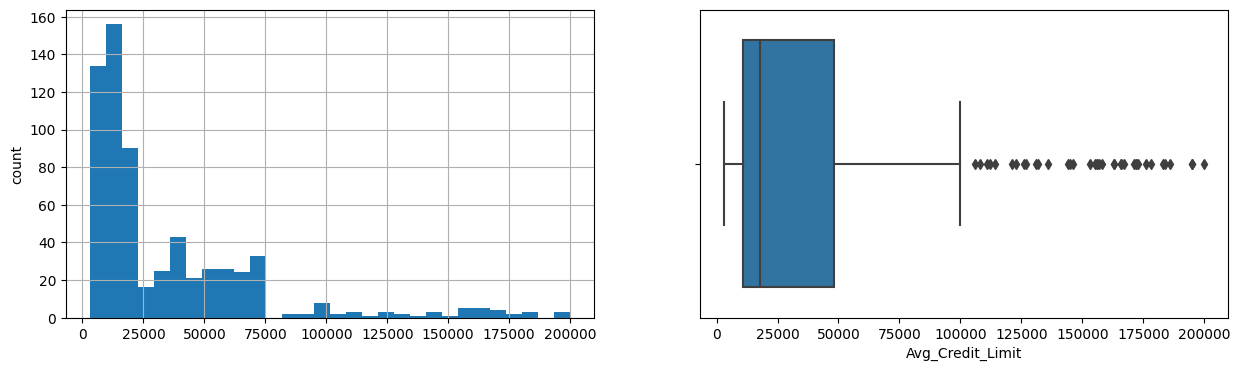

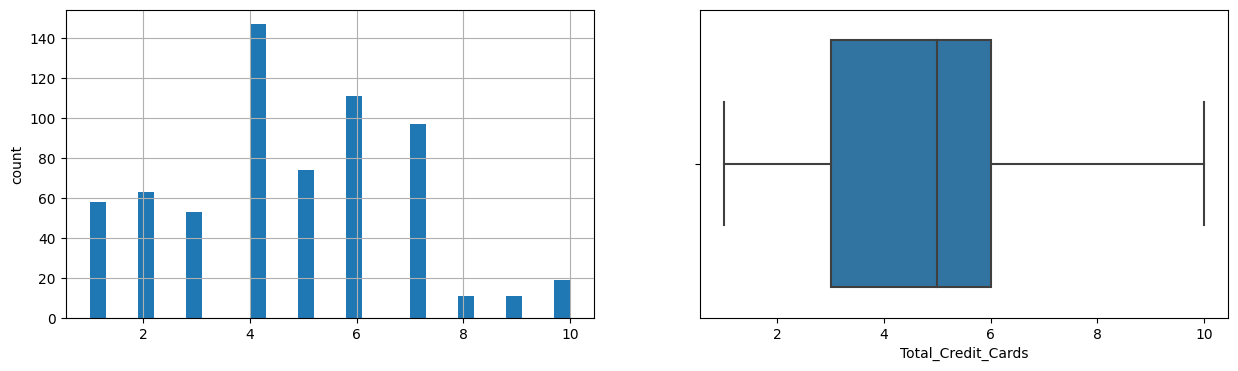

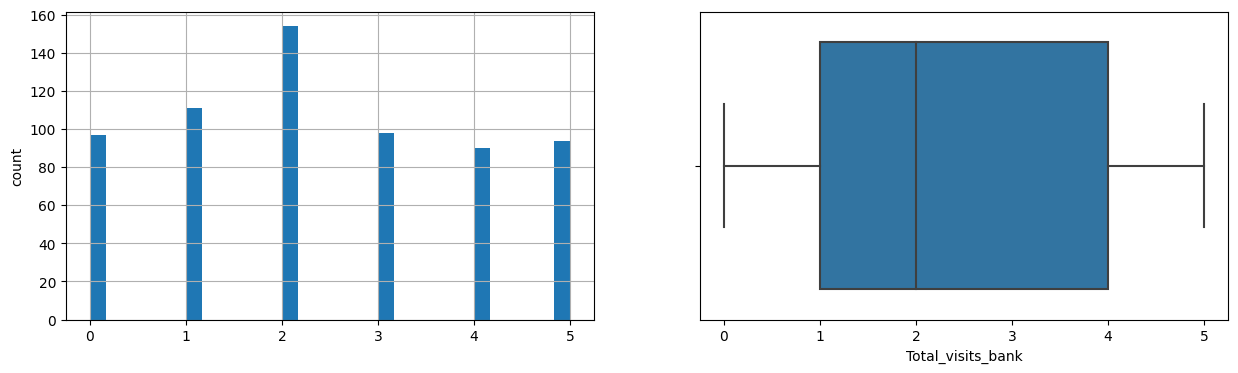

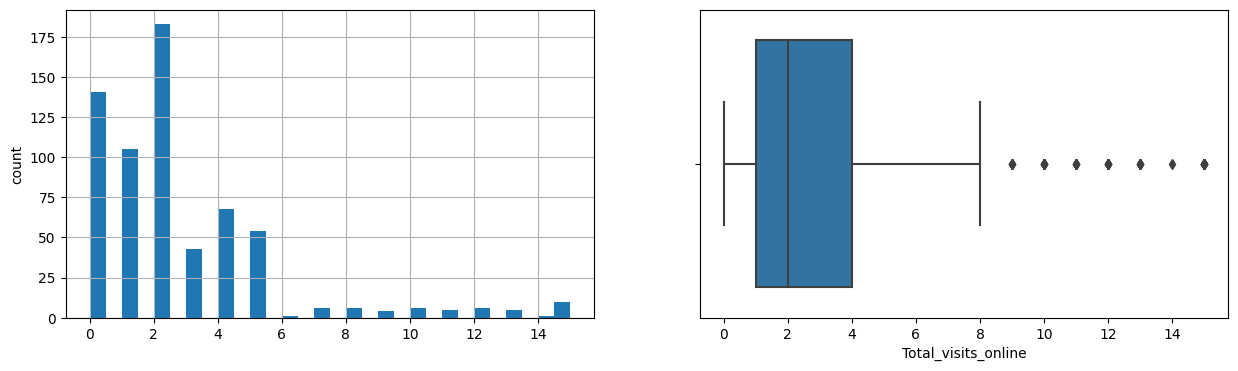

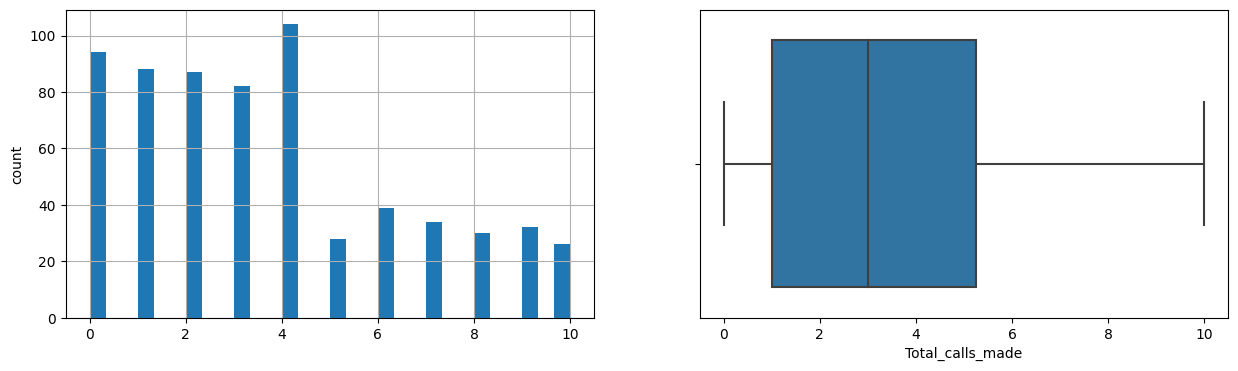

In [ ]:
 for col in nddf.columns:  # looping through columns displaying box plots and histograms
    print(col)
    print('Skew :', round(nddf[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    nddf[col].hist(bins= 30)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = nddf[col])
plt.show()

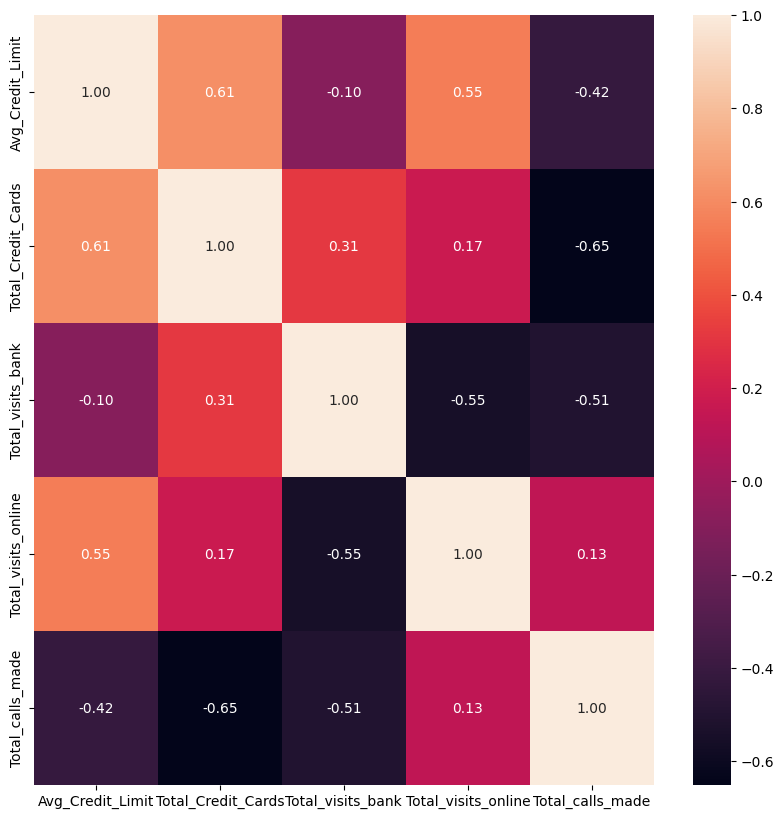

In [ ]:
plt.figure(figsize = (10, 10))  # displays a heatmap for coorelation
sns.heatmap(nddf.corr(), annot = True, fmt = '0.2f')
plt.show()

In [ ]:
data_scaled = scaler_s.fit_transform(nddf)  # scaling data with standard scaling
n = nddf.shape[1]

In [ ]:
pca = PCA(n_components=n)
principal_components = pca.fit_transform(data_scaled)  # fit transforing the scaled data for PCA algorthim
data_pca = pd.DataFrame(principal_components, columns = nddf.columns)
data_copy = data_pca.copy(deep = True) 
data_pca.shape

(644, 5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

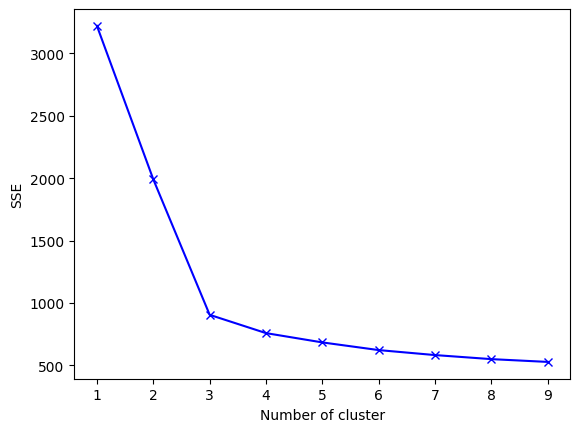

In [ ]:
sse = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, max_iter = 1000, random_state = 1).fit(data_pca) # iterate for a range of Ks and fit the pca components to the algorithm. 
    sse[k] = kmeans.inertia_                                                         # Use inertia attribute from the clustering object and store the inertia value for that K
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3) # applying the K-Means algorithm
kmeans.fit(data_pca)                   
data_copy['Labels'] = kmeans.labels_    
nddf['Labels'] = kmeans.labels_  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
nddf.Labels.value_counts() # checking on the value counts

0    374
1    221
2     49
Name: Labels, dtype: int64

In [ ]:
mean = nddf.groupby('Labels').mean()  # groupby labels to get the average
median = nddf.groupby('Labels').median() # groupby labels to get the median 
df_kmeans = pd.concat([mean, median], axis = 0) # concat mena and median
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,33893.048128,12239.819005,140102.040816,31500.0,12000.0,145000.0
Total_Credit_Cards,5.508021,2.411765,8.775510,6.0,2.0,9.0
Total_visits_bank,3.489305,0.945701,0.591837,3.0,1.0,1.0
Total_visits_online,0.975936,3.561086,10.979592,1.0,4.0,11.0
Total_calls_made,1.997326,6.891403,1.102041,2.0,7.0,1.0


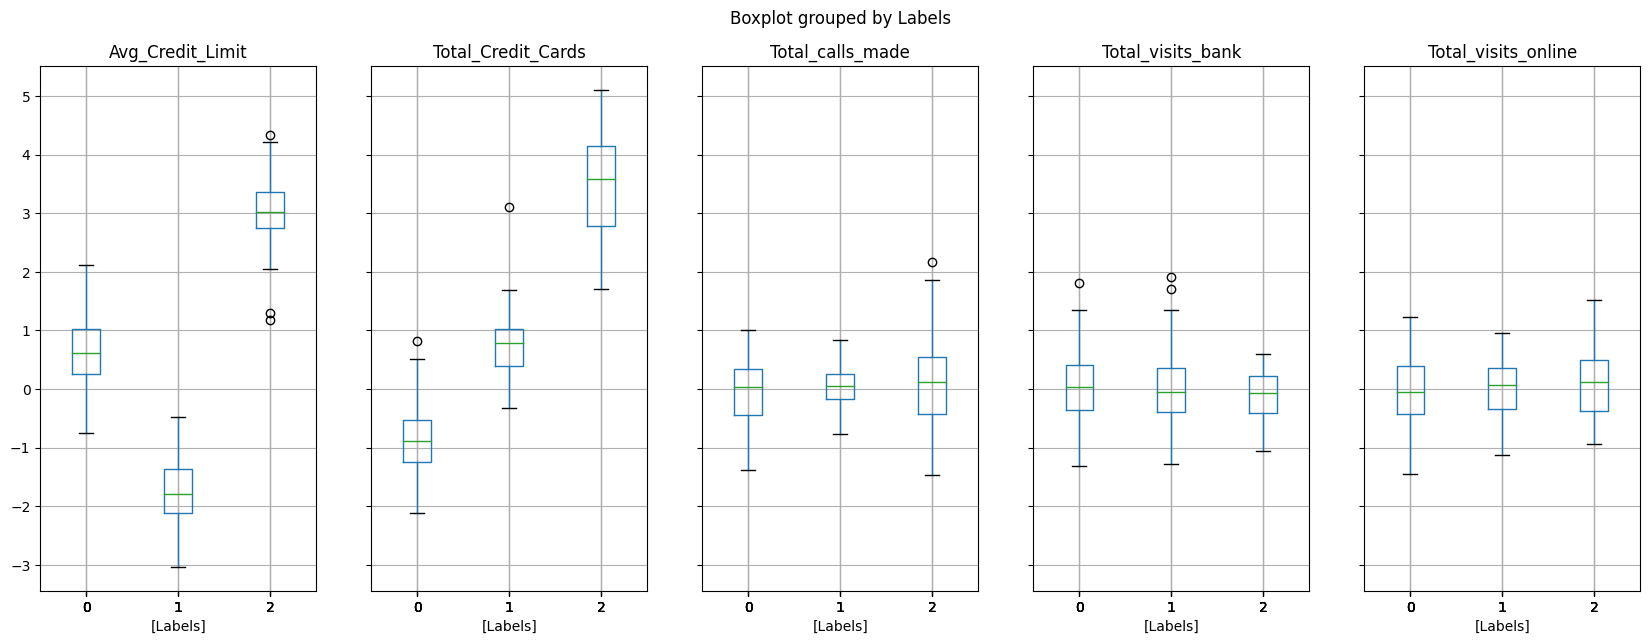

In [ ]:
data_copy.boxplot(by = 'Labels', layout = (1, 5), figsize = (20, 7)) # displays box plot by labels
plt.show()

In [ ]:
gmm =  GaussianMixture(n_components=3)  # applying gmm algorthim/creating Gaussian Mixture Mode
gmm.fit(data_copy)   
data_copy['GmmLabels'] = gmm.predict(data_copy)
nddf["GmmLabels"] = gmm.predict(nddf)


In [ ]:
data_copy.GmmLabels.value_counts() # checking on the value counts again

0    374
1    221
2     49
Name: GmmLabels, dtype: int64

In [ ]:
original_features = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]
mean = data_copy.groupby('GmmLabels').mean()
median = data_copy.groupby('GmmLabels').median() # calculating the summary statistics of the original data for each label
df_gmm = pd.concat([mean, median], axis = 0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,0.647367,-1.765742,3.022731,0.618258,-1.786793,3.014054
Total_Credit_Cards,-0.891737,0.731551,3.506869,-0.886605,0.780932,3.576816
Total_visits_bank,0.024303,-0.015538,-0.115418,0.034123,-0.057255,-0.068539
Total_visits_online,-0.031933,0.032553,0.096916,-0.044403,0.068753,0.122163
Total_calls_made,-0.038765,0.036668,0.130501,0.028601,0.053566,0.119134


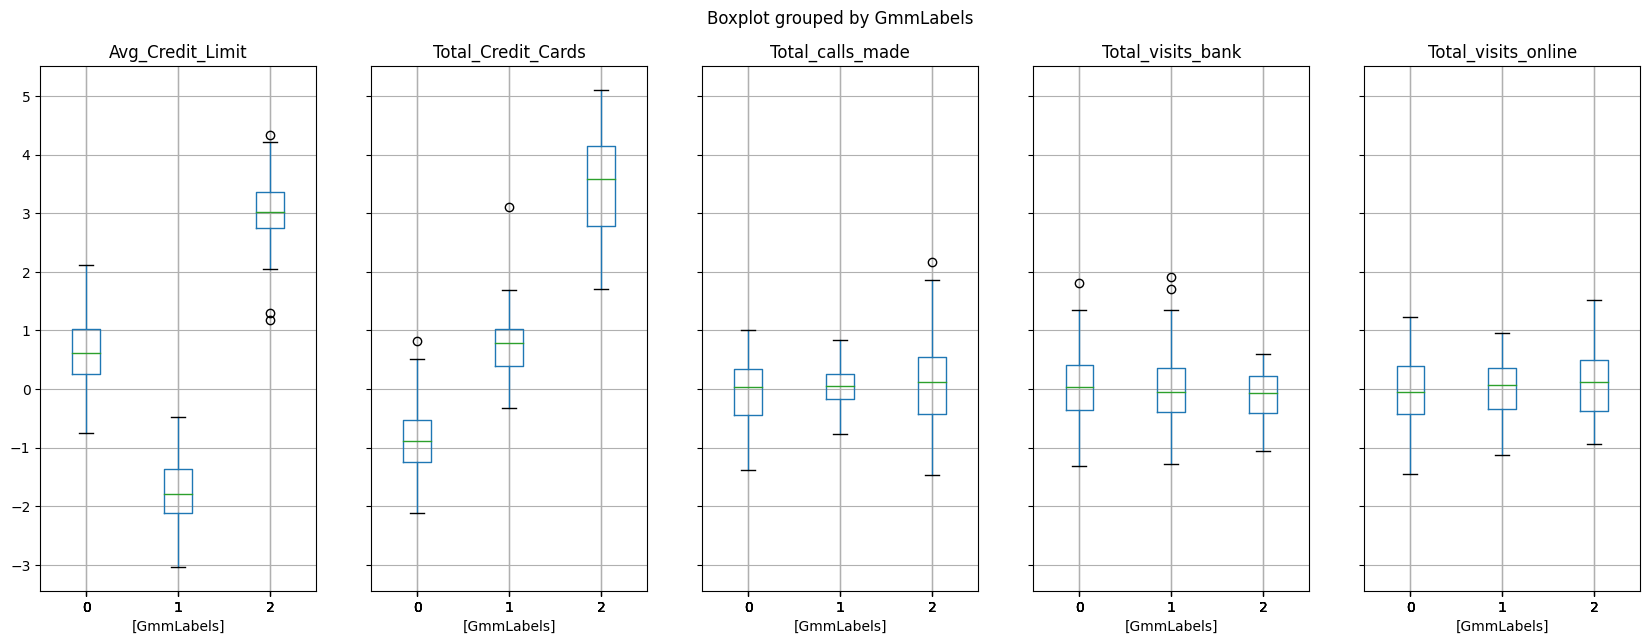

In [ ]:
features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "GmmLabels"]
data_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1, 5),figsize = (20, 7))  # displays box plots by gmm labels
plt.show()

In [ ]:
kmedo = KMedoids(n_clusters=3)    # apply the K-Medoids algorithm on the pca components
kmedo.fit(data_copy)     
nddf['kmedoLabels'] = kmedo.predict(data_copy)
data_copy['kmedoLabels'] = kmedo.predict(data_copy)


In [ ]:
nddf.kmedoLabels.value_counts()  # checking the valu counts again

1    234
0    217
2    193
Name: kmedoLabels, dtype: int64

In [ ]:
mean = nddf.groupby('kmedoLabels').mean() # summary statistics of the original data for each label 
median = nddf.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis = 0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,66299.539171,17957.264957,18948.186528,57000.0,13000.0,15000.0
Total_Credit_Cards,6.331797,2.722222,5.243523,6.0,2.0,5.0
Total_visits_bank,2.585253,0.910256,3.984456,3.0,1.0,4.0
Total_visits_online,2.474654,4.072650,1.036269,1.0,4.0,1.0
Total_calls_made,1.903226,6.585470,1.917098,2.0,7.0,2.0


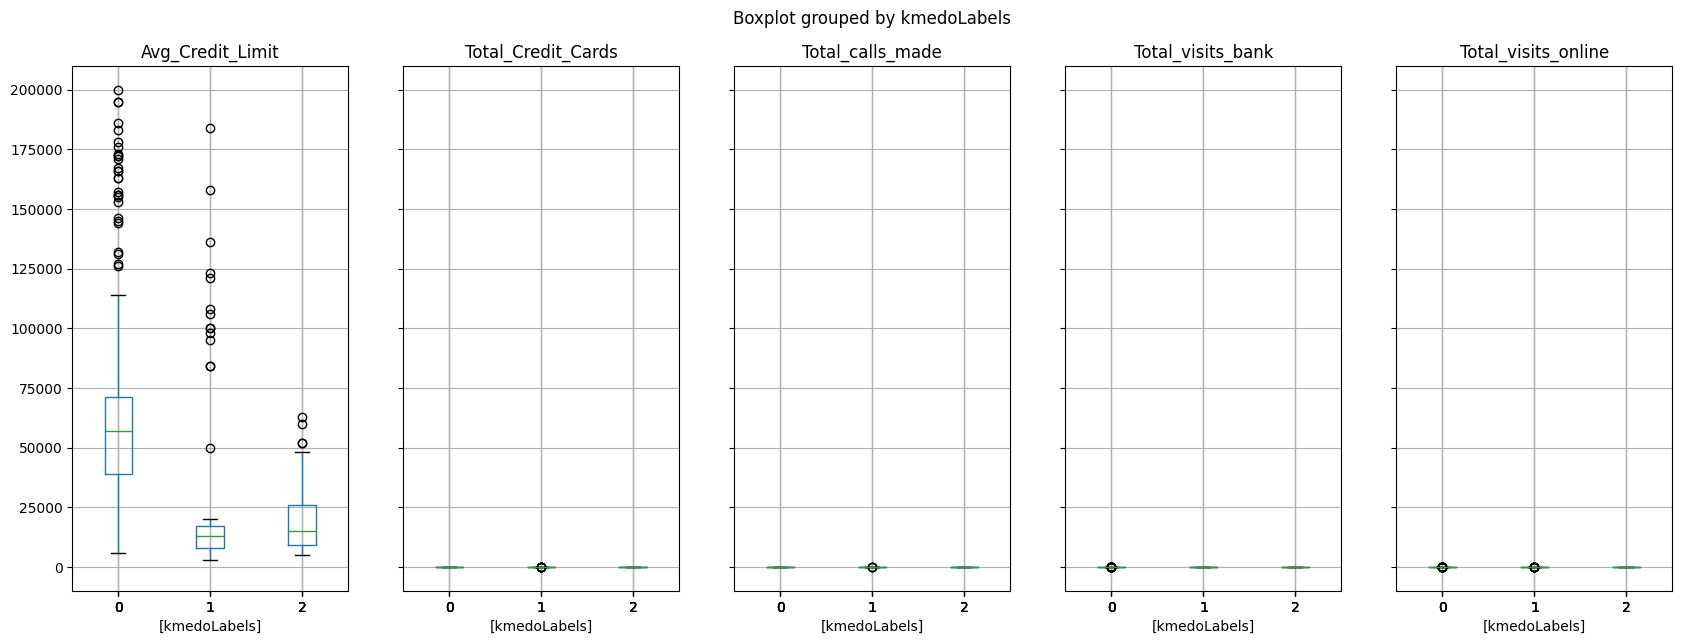

In [ ]:
features_with_lables = ["Avg_Credit_Limit", "Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made", "kmedoLabels"]
nddf[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1, 5), figsize = (20, 7))
plt.show() # displas boxplots with the new K-Medoids based labels

In [ ]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis = 1)[original_features] # finally, this compares the clusters from K-Means and K-Medoids 
comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,66299.539171,33893.048128,6.331797,5.508021,2.585253,3.489305,2.474654,0.975936,1.903226,1.997326
group_1 Mean,17957.264957,12239.819005,2.722222,2.411765,0.910256,0.945701,4.072650,3.561086,6.585470,6.891403
group_2 Mean,18948.186528,140102.040816,5.243523,8.775510,3.984456,0.591837,1.036269,10.979592,1.917098,1.102041
group_0 Median,57000.000000,31500.000000,6.000000,6.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000
group_1 Median,13000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_2 Median,15000.000000,145000.000000,5.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Conclusion:**

After breaking down peoples spending habits its boils down to 3 types of people. first customers with more credit cards have a much higher credit limit which means they are more likely to spend their money with a carefree attitude. Then the other two categories that do not have many credit cards or lower credit limits carefully monitoring their spending habits. This breaks down to two simple profiles for customers. Customers who have multiple credit cards and higher credit limits would be targets for upselling existing customers. The other would be customers with less credit cards and lower limits, these would be a target audience for savaings programs. Teaching money saving tips and tricks to help with client retention and customer service. 